# Running Average
## 1. Using Standard DAX
    ROLLING_AVERAGE = 
    VAR period = DATESINPERIOD('OnlineSales Calendar'[Date],MAX('OnlineSales Calendar'[Date]),-12,MONTH)
    VAR result = 
            CALCULATE(
                AVERAGEX(
                    VALUES('OnlineSales Calendar'[Date].[MonthNo]),[Sales_Amount]
                    ),
                period)
    RETURN result

## 2. Using Window Functions
    moving_average 12 months = 
            AVERAGEX(WINDOW(
                -11,REL,
                0,REL,
        ORDERBY('OnlineSales Calendar'[YearMonth],ASC)
            ),[Sales_Amount]
        )

## 3. Using Calculate, and Window Functions
    moving_average 12 months_calc = 
            CALCULATE(AVERAGEX(VALUES('OnlineSales Calendar'[YearMonth]),[Sales_Amount]),
            WINDOW(
                -11,REL,
                0,REL,
        ORDERBY('OnlineSales Calendar'[YearMonth],ASC)
            )
        )

Note that: 
1. __period__ is the window in which average is calculated for. Here it is defined as calendar date starting maximum for the filter period indicated in the table output (which is Year and Month in this case) and going back 12 months.
2. The table over which averagex is using as input has to be defined by the filter context in the output table. In this case, it is Year and  Month. __MonthNo__ (Month numnber) is chosen here. Hence, __VALUES('OnlineSales Calendar'[Date].[MonthNo])__
3. Maximum number for each row in the output is defined by the row context in the output which is __month__. Meaning, __last date of each month__ is used as reference.
4. CALCULATE measures average for every month taking average for the past 12 months starting from the last date of the month.
5. All date functions have to come from __date calendar table__

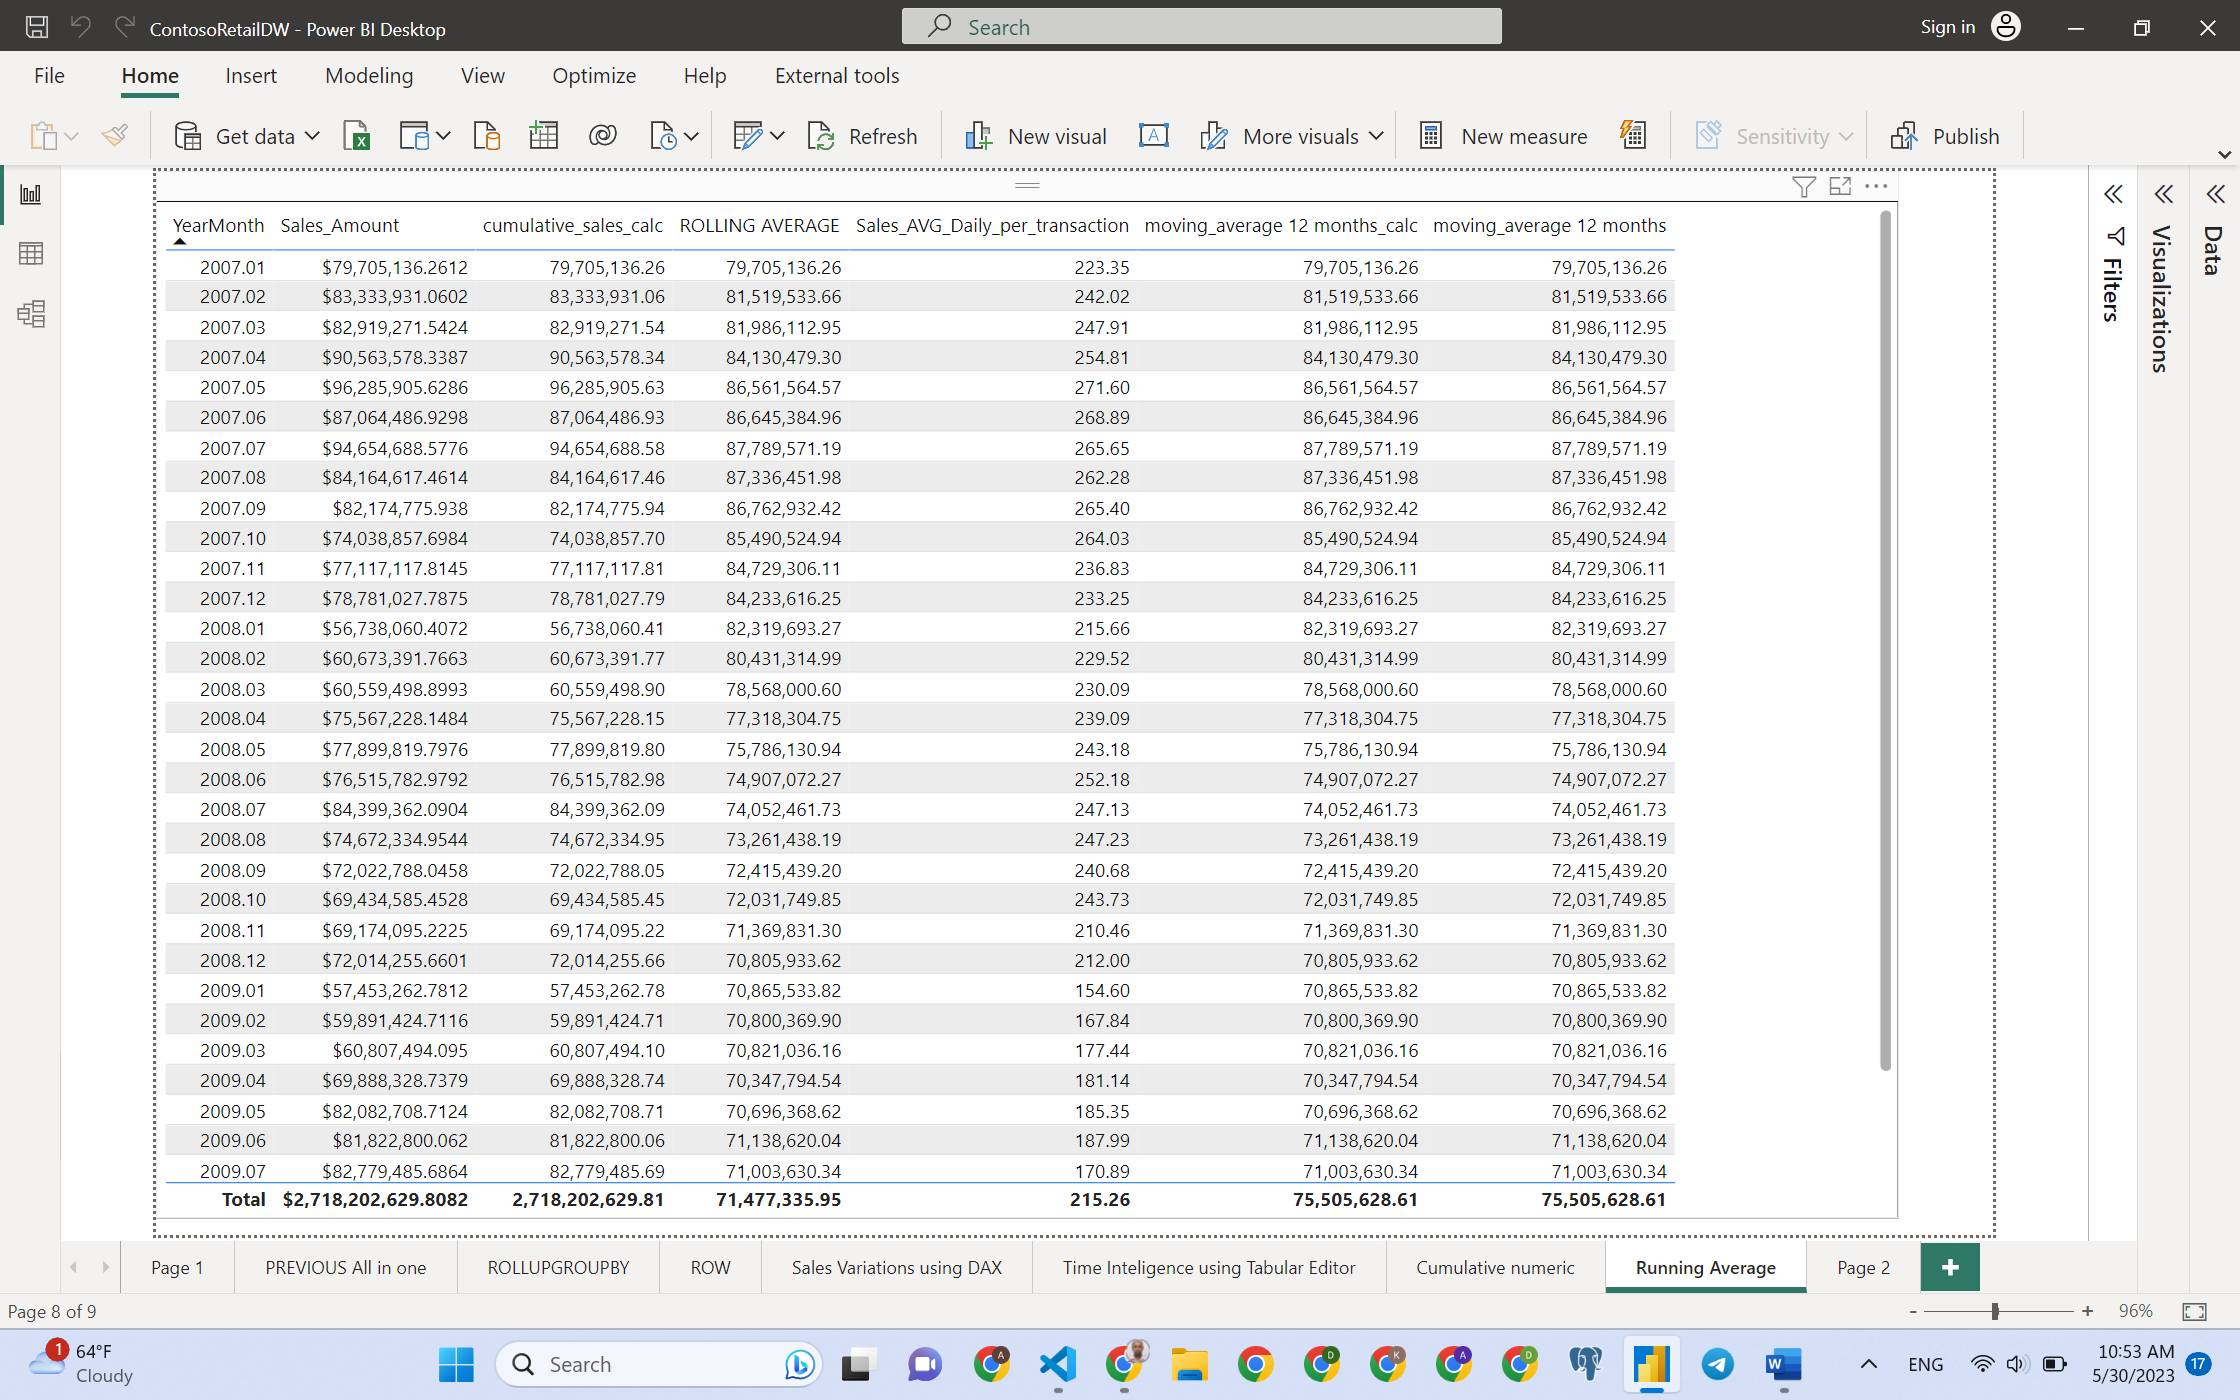

> Note that this will give monthly average taking all transactions in a month as aveerage 

    Sales_AVG_Daily_per_transaction = 
        AVERAGEX(
            FactOnlineSales,
            FactOnlineSales[SalesAmount]
        )

> Also note that the graph for moving average works with __Standard DAX__ and not with that calculated with __WINDOW FUNCTION__ below 

> Note that the x axis is YearMonthName from OnlineSales Calendar table. It is made as follows: 


FORMAT('OnlineSales Calendar'[Date],"m YYYY") 


while, for calculation purposes within the Window Funciton, the numerical version of YearMonth was used calculated as: 


YEAR('OnlineSales Calendar'[Date])+MONTH('OnlineSales Calendar'[Date])/100.

Finally, YearMonthName was sorted by YearMonth in Table view so that the correct order can be viewed in the X- Axis of the graph below.

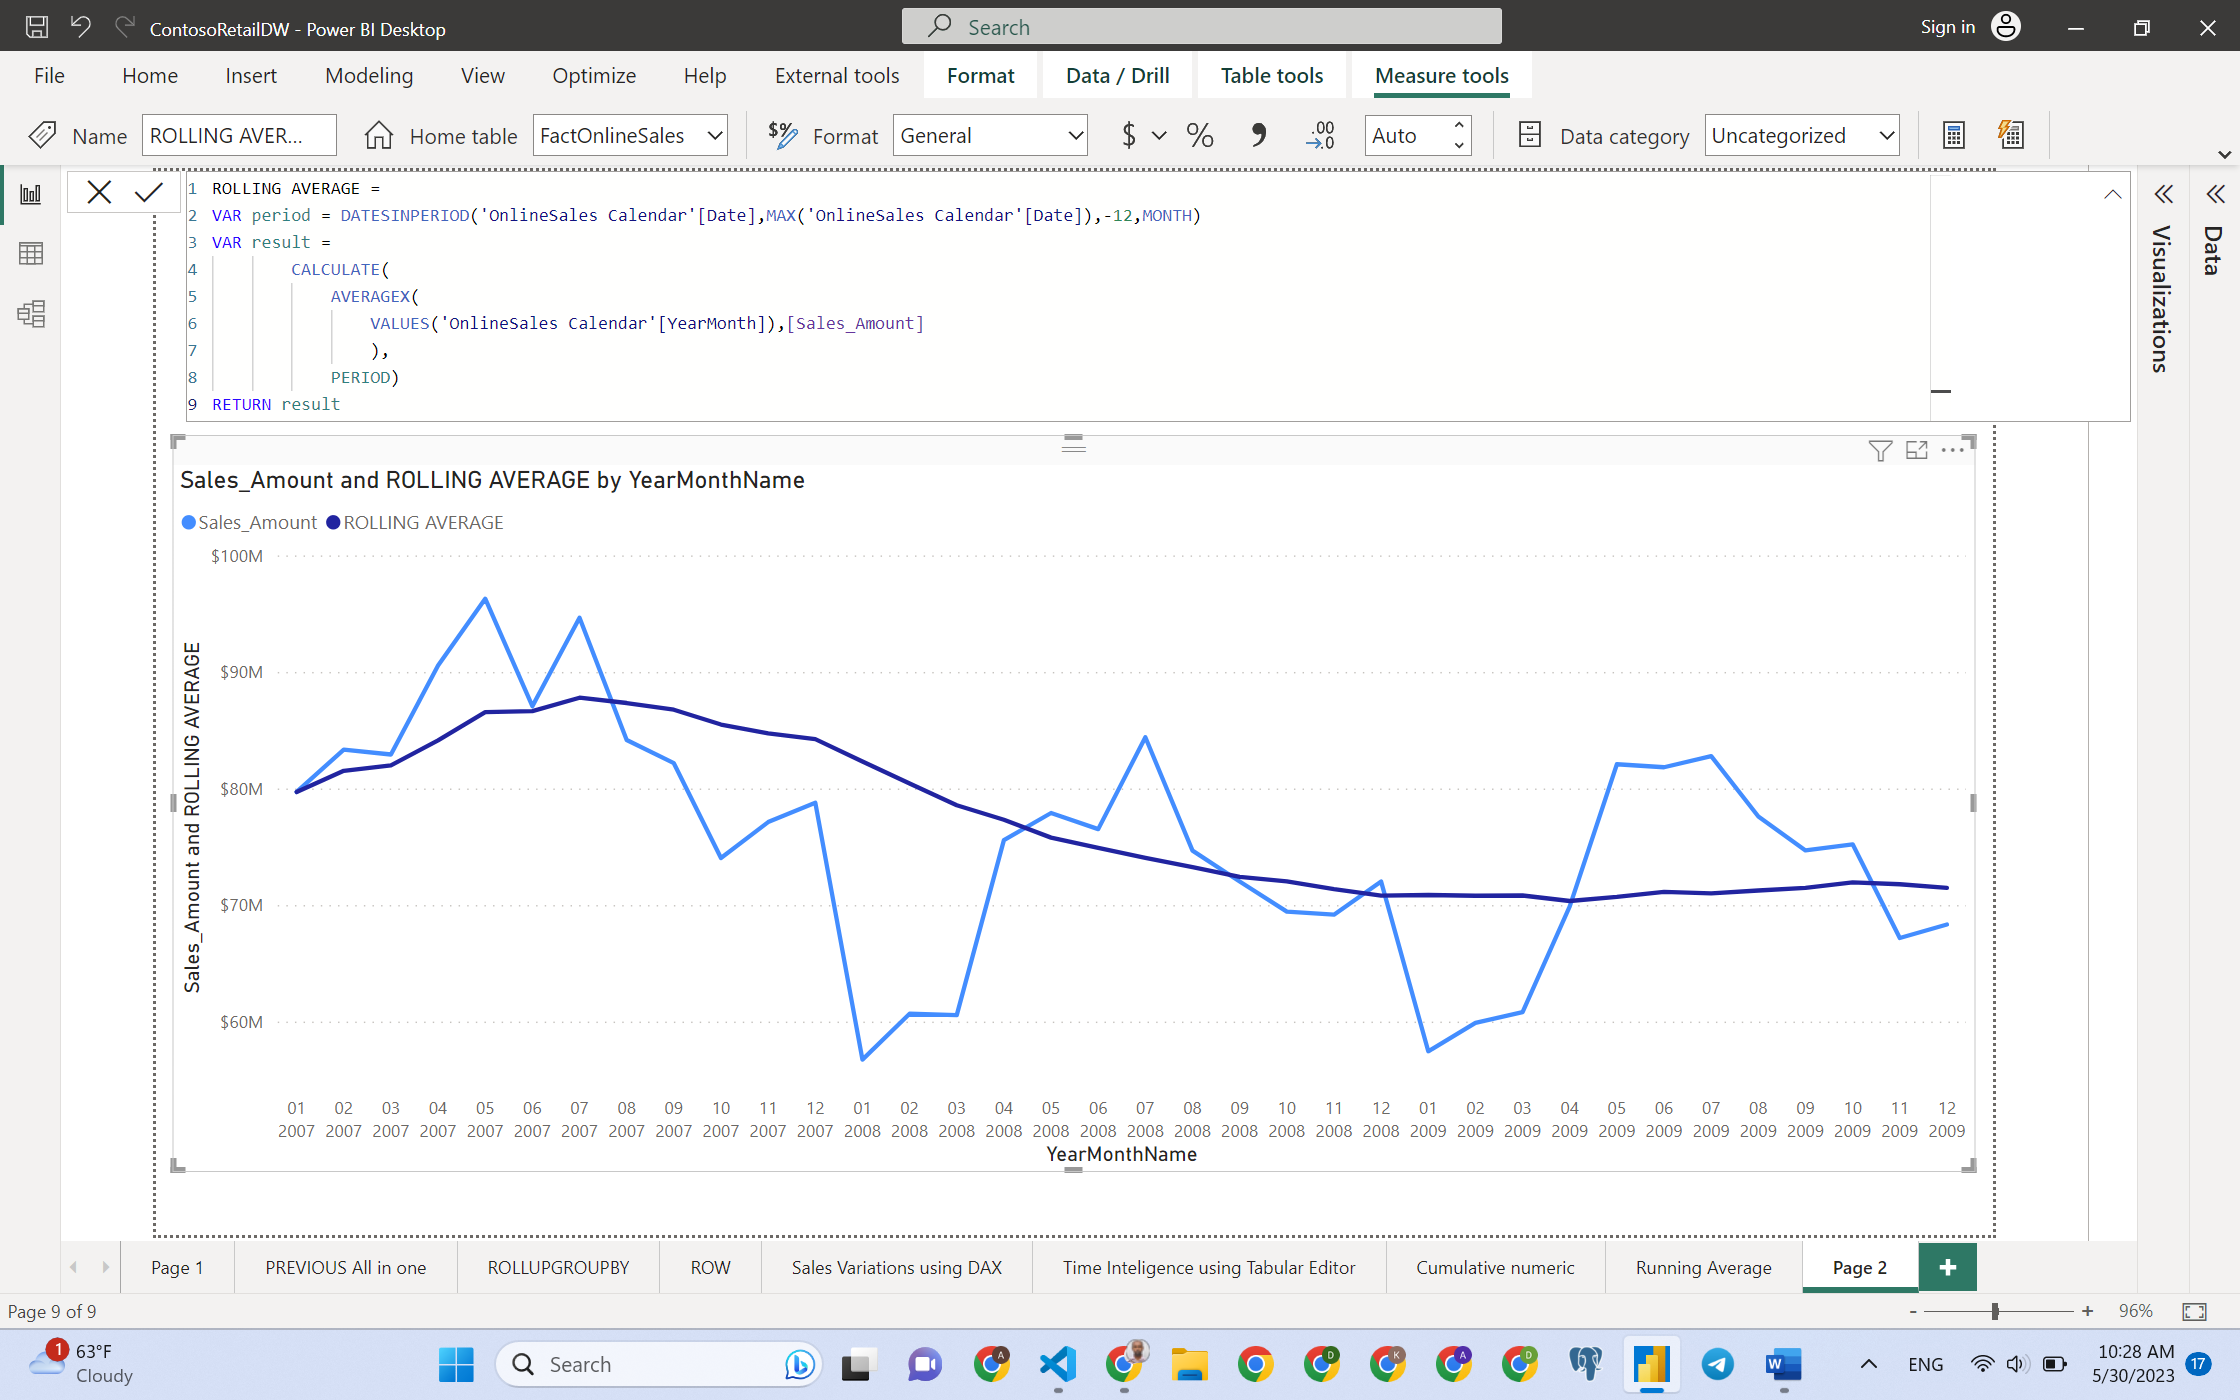